Problem Statement
-----------------

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. Our goal is to create a model that will help predict this.

We will be using lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", 
"small_business", and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

### Get Data and show its Stats

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [15]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

###### The dataset appears to be imbalanced as we dont have a apprx equal distribution of the data

## Exploratory Data Analysis

In [126]:
#Get the correlation of Label as compared to other Features
df.corr()['not.fully.paid'].sort_values()

credit.policy       -0.158119
fico                -0.149666
log.annual.inc      -0.033439
days.with.cr.line   -0.029237
delinq.2yrs          0.008881
dti                  0.037362
pub.rec              0.048634
installment          0.049955
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
int.rate             0.159552
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

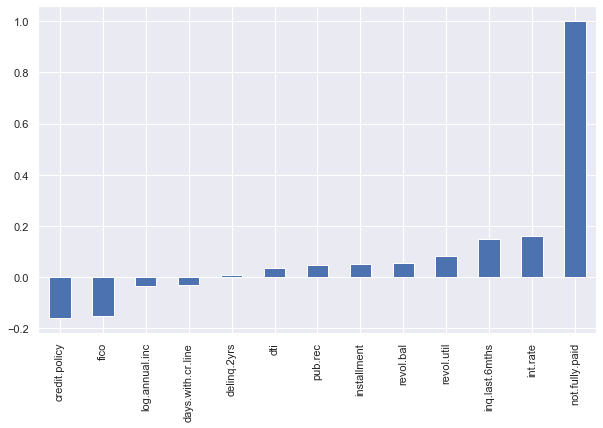

In [131]:
df.corr()['not.fully.paid'].sort_values().plot(kind='bar',figsize=(10,6))

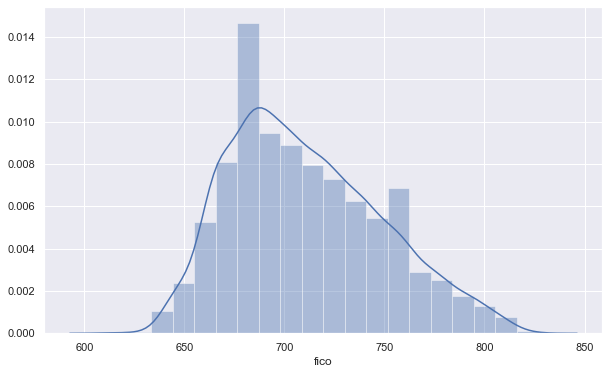

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['fico'],bins=20)

(array([   4.,    8.,  107.,  243.,  541.,  833., 1511.,  974.,  916.,
         819.,  749.,  643.,  560.,  709.,  300.,  258.,  182.,  131.,
          78.,   12.]),
 array([612.  , 622.75, 633.5 , 644.25, 655.  , 665.75, 676.5 , 687.25,
        698.  , 708.75, 719.5 , 730.25, 741.  , 751.75, 762.5 , 773.25,
        784.  , 794.75, 805.5 , 816.25, 827.  ]),
 <a list of 20 Patch objects>)

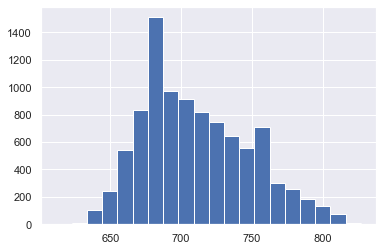

In [67]:
plt.hist(df['fico'],bins=20)

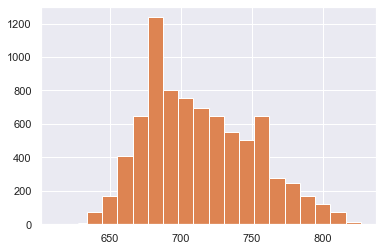

In [122]:
#plt.hist(df[df['not.fully.paid']==1]['fico'],bins=20)
#plt.hist(df[df['not.fully.paid']==0]['fico'],bins=20)

df[df['not.fully.paid']==1]['fico'].hist(bins=20)
df[df['not.fully.paid']==0]['fico'].hist(bins=20)

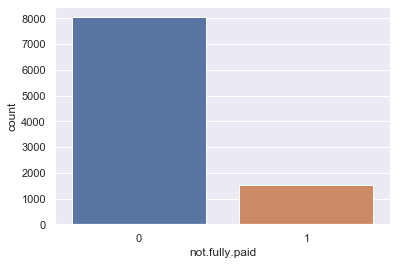

In [21]:
sns.countplot(data=df,x='not.fully.paid')

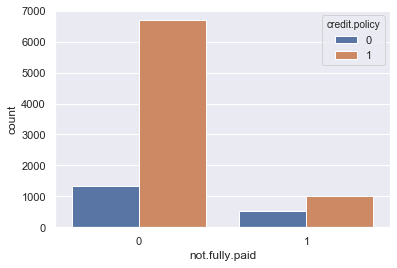

In [16]:
sns.countplot(data=df,x='not.fully.paid',hue='credit.policy')

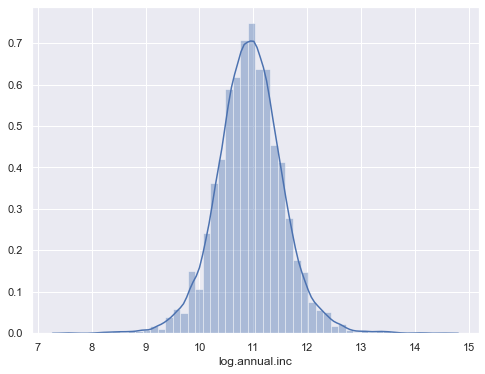

In [28]:
#df[['fico']].plot(kind = 'hist')
plt.figure(figsize=(8,6))
sns.distplot(df['log.annual.inc'])

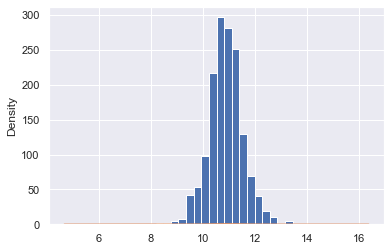

In [42]:
df[df['not.fully.paid']==1]['log.annual.inc'].plot(kind='hist',bins=20)

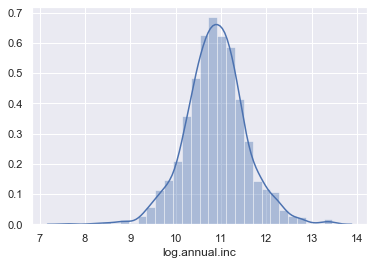

In [45]:
sns.distplot(df[df['not.fully.paid']==1]['log.annual.inc'],bins=30)

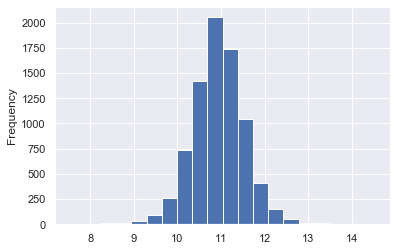

In [40]:
df[df['not.fully.paid']==0]['log.annual.inc'].plot(kind='hist',bins=20)

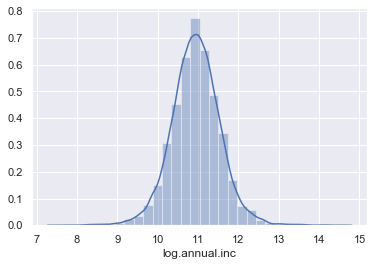

In [47]:
sns.distplot(df[df['not.fully.paid']==0]['log.annual.inc'],bins=30)

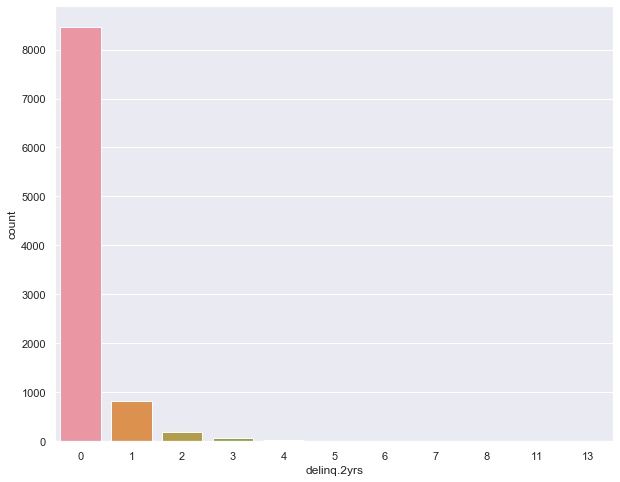

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='delinq.2yrs') #,hue='not.fully.paid'

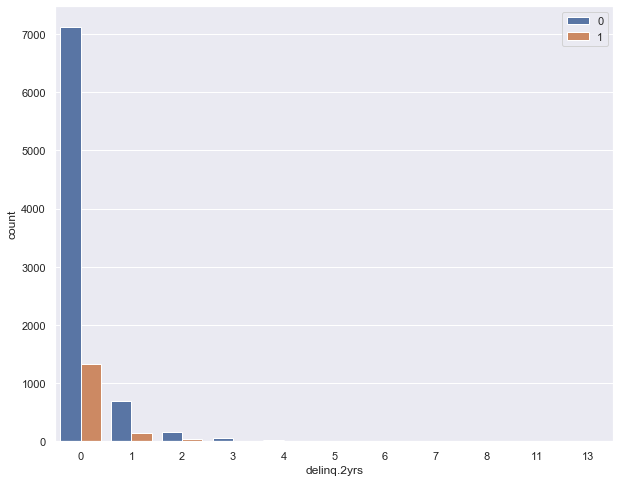

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='delinq.2yrs',hue='not.fully.paid') 
plt.legend()

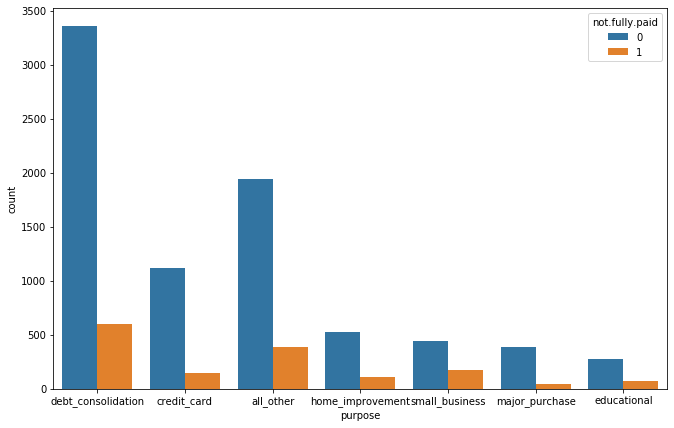

In [53]:
plt.figure(figsize=(11,7))
sns.countplot(data = df, x='purpose',hue = 'not.fully.paid')

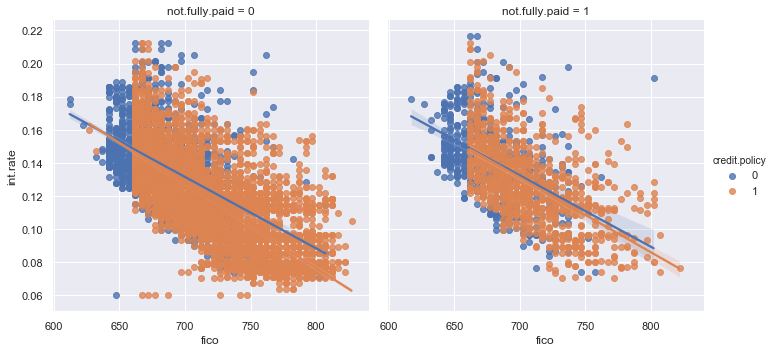

In [79]:
#plt.figure(figsize=(14,6)) #this is having no impact on the size of the  figure
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

# Setting up Data and Formatting

### Categorical Data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [81]:
#We observer that 'purpose' feature is non-numeric. Lets explore it further

In [91]:
#Get the unique values of feature 'purpose'
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [84]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [85]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Creating Dummy Variables

In [94]:
final_df = pd.get_dummies(data=df,columns = ['purpose'], drop_first=True)

In [95]:
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [96]:
final_df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [97]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = final_df.drop('not.fully.paid',axis=1)

In [101]:
y = final_df['not.fully.paid']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [106]:
X_train.shape

(6704, 18)

In [107]:
y_train.shape

(6704,)

In [108]:
X_test.shape

(2874, 18)

In [109]:
y_test.shape

(2874,)

### Build a Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree_ob = DecisionTreeClassifier()

In [110]:
dtree_ob.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predictions and Evaluation of Decision Tree

In [111]:
pred = dtree_ob.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [114]:
print(confusion_matrix(y_test,pred))

[[1984  447]
 [ 340  103]]


### Build a Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc_ob = RandomForestClassifier(n_estimators=200)

In [118]:
rfc_ob.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation of Random Forest Classifier

In [119]:
rfc_pred = rfc_ob.predict(X_test)

In [132]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [133]:
print(confusion_matrix(y_test,pred))

[[1984  447]
 [ 340  103]]
